In [ ]:
pip install obsei dataparser

In [ ]:
pip install obsei dateparser

In [ ]:
from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig,
    ZeroShotClassificationAnalyzer,
)
from obsei.source import YoutubeScrapperSource, YoutubeScrapperConfig

In [ ]:
source_config = YoutubeScrapperConfig(
    video_url="https://www.youtube.com/watch?v=myjEoDypUD8",
    fetch_replies=False,
    max_comments=50,
    lookup_period="1Y",
)

In [ ]:
source = YoutubeScrapperSource()


In [ ]:
source_response_list = source.lookup(source_config)
for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")

source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'Ugy4u9NnBUVEReeP-gR4AaABAg', 'text': 'Will Smith wins best actor Oscar for King Richard ► https://www.theguardian.com/film/2022/mar/28/will-smith-wins-best-actor-oscar-for-king-richard\nThe slap, the fallout and a little dog: standout 2022 Oscars memes and reactions ► https://www.theguardian.com/film/2022/mar/28/oscars-memes-reactions-2022\nHistoric wins, Will Smith’s punch and silk pyjamas: Oscars 2022– in pictures ► https://www.theguardian.com/film/gallery/2022/mar/28/oscars-2022-in-pictures-gallery-will-smith-silk-pyjamas', 'time': datetime.datetime(2022, 3, 31, 20, 11, 5, 972404, tzinfo=datetime.timezone.utc), 'author': 'Guardian News', 'channel': 'UCIRYBXDze5krPDzAEOxFGVA', 'votes': '20K', 'photo': 'https://yt3.ggpht.com/ytc/AKedOLQNHeFhVI28gKq6WNMMKMLtyPFFO8MBrwDaAPjWDg=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, 'source_name': 'YoutubeScrapper', 'processed_text': 'Will Smith wins best actor Oscar for King Rich

In [ ]:
text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)


Downloading:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/94.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'positive': 0.993583619594574, 'negative': 0.0004441285855136812}}, 'meta': {'comment_id': 'Ugy4u9NnBUVEReeP-gR4AaABAg', 'text': 'Will Smith wins best actor Oscar for King Richard ► https://www.theguardian.com/film/2022/mar/28/will-smith-wins-best-actor-oscar-for-king-richard\nThe slap, the fallout and a little dog: standout 2022 Oscars memes and reactions ► https://www.theguardian.com/film/2022/mar/28/oscars-memes-reactions-2022\nHistoric wins, Will Smith’s punch and silk pyjamas: Oscars 2022– in pictures ► https://www.theguardian.com/film/gallery/2022/mar/28/oscars-2022-in-pictures-gallery-will-smith-silk-pyjamas', 'time': datetime.datetime(2022, 3, 31, 20, 20, 43, 72131, tzinfo=datetime.timezone.utc), 'author': 'Guardian News', 'channel': 'UCIRYBXDze5krPDzAEOxFGVA', 'votes': '20K', 'photo': 'https://yt3.ggpht.com/ytc/AKedOLQNHeFhVI28gKq6WNMMKMLtyPFFO8MBrwDaAPjWDg=s176-c-k-c0x00ffffff-no-rj', 'heart': False}, 'source_name

In [ ]:
from pandas import DataFrame
from obsei.sink.pandas_sink import  PandasSink, PandasSinkConfig

In [ ]:
sink_config = PandasSinkConfig(
    dataframe =  DataFrame()
)
sink = PandasSink()

In [ ]:
dataframe = sink.send_data(analyzer_response_list,  sink_config)

In [ ]:
dataframe

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,Will Smith wins best actor Oscar for King Rich...,0.99,0.00,Ugy4u9NnBUVEReeP-gR4AaABAg,Will Smith wins best actor Oscar for King Rich...,2022-03-31 20:20:43.072131+00:00,Guardian News,UCIRYBXDze5krPDzAEOxFGVA,20K,https://yt3.ggpht.com/ytc/AKedOLQNHeFhVI28gKq6...,False,YoutubeScrapper
1,Why isn't this assault then?,0.01,0.95,UgyjSvj_bkXoNy5IEbF4AaABAg,Why isn't this assault then?,2022-04-21 20:14:43.075454+00:00,Sam Wigginton,UC2MsXFEEy8arc_SPRWWyE_Q,0,https://yt3.ggpht.com/ytc/AKedOLRGHMuaS8cQXxK-...,False,YoutubeScrapper
2,Not to mention My thick head. You can´t MISS i...,0.93,0.20,Ugx6rVUmMoGSutM6gmR4AaABAg,Not to mention My thick head. You can´t MISS i...,2022-04-21 19:59:43.078701+00:00,DUDE! Me & My Big Mouth,UCiqcIz_qoLOlGH8-VooMIXA,0,https://yt3.ggpht.com/PClK_PjO9HiE5fl4JZ0wBUU0...,False,YoutubeScrapper
3,The record for the most views in 24 hours afte...,0.66,0.00,UgzvgB7Faj_w3JZrKVd4AaABAg,The record for the most views in 24 hours afte...,2022-04-21 19:57:43.081572+00:00,XBOX360GAMEZ,UCJnI3Ylu16o7ykBqiAU0sSg,0,https://yt3.ggpht.com/gFwmQqEPHnfdQcUXFwMCNJHe...,False,YoutubeScrapper
4,"Bravo! Will Smith!\r\nBefore this, I had never...",0.01,0.87,Ugz5Q1_pc7UD-CTW16J4AaABAg,"Bravo! Will Smith!\r\nBefore this, I had never...",2022-04-21 19:53:43.084303+00:00,We're Not Gonna Take It,UCUMIgOtJSQHepPsarnuxQUQ,0,https://yt3.ggpht.com/kffHNMCqmah_JQBmRlFO-R46...,False,YoutubeScrapper
5,"""Slap Chris Rock 2"" will be out later this fal...",0.61,0.64,Ugw6-wKfwinEAkxBkxF4AaABAg,"""Slap Chris Rock 2"" will be out later this fal...",2022-04-21 19:47:43.087054+00:00,Slap the Zebra,UCdfBLG3S86n5-e8APku_EmA,0,https://yt3.ggpht.com/eaWDIFR2EXsGa9meVOBsaly_...,False,YoutubeScrapper
6,"Cause I can't get enough\r\nYeah, I can't get ...",0.80,0.51,Ugx6A6NiI-GBEaMyFPB4AaABAg,"Cause I can't get enough\r\nYeah, I can't get ...",2022-04-21 19:38:43.089842+00:00,DONKEYASS,UCCJ5ldCAP_fqu1pmgzZbeJg,0,https://yt3.ggpht.com/eoJ7q2EjpgGDEsl-HILld6Zl...,False,YoutubeScrapper
7,She can laugh about her cheating but can’t lau...,0.15,0.94,UgyVBcljd8LfS3RubfV4AaABAg,She can laugh about her cheating but can’t lau...,2022-04-21 19:20:43.091555+00:00,D J137,UCi7OH-Y13U77s_6vMxAnyjQ,0,https://yt3.ggpht.com/ytc/AKedOLSqgsllk3LXAKef...,False,YoutubeScrapper
8,C’est pas bien,0.91,0.01,Ugz1A2nqgy8uhPYHMNp4AaABAg,C’est pas bien,2022-04-21 19:20:43.093141+00:00,Moreau Delphine,UCxoCDA__tphJKdl0fhSlA_w,0,https://yt3.ggpht.com/YAfn7g-pBfVDHR2-oVJsldNt...,False,YoutubeScrapper
9,That's where I know Jada from! She's Fish Moon...,0.88,0.07,UgwRyUbTId2dcDTfrtJ4AaABAg,That's where I know Jada from! She's Fish Moon...,2022-04-21 19:20:43.095597+00:00,Jerome Valeska,UCKNgqaIPw_AEYpyDvkfPYwg,0,https://yt3.ggpht.com/V6fjUinPGKh4OYAYV3H2_LKX...,False,YoutubeScrapper


In [ ]:
import pandas as pd 

In [ ]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
1,Why isn't this assault then?,0.01,0.95,UgyjSvj_bkXoNy5IEbF4AaABAg,Why isn't this assault then?,2022-04-21 20:14:43.075454+00:00,Sam Wigginton,UC2MsXFEEy8arc_SPRWWyE_Q,0,https://yt3.ggpht.com/ytc/AKedOLRGHMuaS8cQXxK-...,False,YoutubeScrapper
4,"Bravo! Will Smith!\r\nBefore this, I had never...",0.01,0.87,Ugz5Q1_pc7UD-CTW16J4AaABAg,"Bravo! Will Smith!\r\nBefore this, I had never...",2022-04-21 19:53:43.084303+00:00,We're Not Gonna Take It,UCUMIgOtJSQHepPsarnuxQUQ,0,https://yt3.ggpht.com/kffHNMCqmah_JQBmRlFO-R46...,False,YoutubeScrapper
5,"""Slap Chris Rock 2"" will be out later this fal...",0.61,0.64,Ugw6-wKfwinEAkxBkxF4AaABAg,"""Slap Chris Rock 2"" will be out later this fal...",2022-04-21 19:47:43.087054+00:00,Slap the Zebra,UCdfBLG3S86n5-e8APku_EmA,0,https://yt3.ggpht.com/eaWDIFR2EXsGa9meVOBsaly_...,False,YoutubeScrapper
6,"Cause I can't get enough\r\nYeah, I can't get ...",0.80,0.51,Ugx6A6NiI-GBEaMyFPB4AaABAg,"Cause I can't get enough\r\nYeah, I can't get ...",2022-04-21 19:38:43.089842+00:00,DONKEYASS,UCCJ5ldCAP_fqu1pmgzZbeJg,0,https://yt3.ggpht.com/eoJ7q2EjpgGDEsl-HILld6Zl...,False,YoutubeScrapper
7,She can laugh about her cheating but can’t lau...,0.15,0.94,UgyVBcljd8LfS3RubfV4AaABAg,She can laugh about her cheating but can’t lau...,2022-04-21 19:20:43.091555+00:00,D J137,UCi7OH-Y13U77s_6vMxAnyjQ,0,https://yt3.ggpht.com/ytc/AKedOLSqgsllk3LXAKef...,False,YoutubeScrapper
10,When fresh prince of bel air meets everybody h...,0.03,0.98,UgyH4uUeHCNkYKtttGJ4AaABAg,When fresh prince of bel air meets everybody h...,2022-04-21 19:20:43.097432+00:00,Daniel Amone,UCfhKy6GAP5X7pCcTVp_bpqw,0,https://yt3.ggpht.com/ytc/AKedOLRluiz2wSyqUVja...,False,YoutubeScrapper
11,Will Smith taught me many things since playing...,0.04,0.55,Ugz1VIQ8dvw43a7q2WN4AaABAg,Will Smith taught me many things since playing...,2022-04-21 18:20:43.099103+00:00,Will Smith Stu Harvey,UCv8HWDLcQ7CLxY_L0wfnlBA,1,https://yt3.ggpht.com/7ew7wG7LVsll-S6_0WUYhKVK...,False,YoutubeScrapper
14,I still can't believe most of you who believe ...,0.00,0.96,UgySHZs4QLUlcxWLTax4AaABAg,I still can't believe most of you who believe ...,2022-04-21 18:20:43.103954+00:00,MAXIMUM WEB,UChuSGRgRUDObHoXoNxe5g-Q,0,https://yt3.ggpht.com/ytc/AKedOLQ1NIQsatPoKos7...,False,YoutubeScrapper
15,chris smug look at the end,0.27,0.69,UgzQd3SNRJY-2i9qlEN4AaABAg,chris smug look at the end,2022-04-21 18:20:43.105466+00:00,living_coathanger,UCu0RZz9X8CmRXWZekfMxPNg,0,https://yt3.ggpht.com/yIvPEk3spF4cLarsBYj3ONmt...,False,YoutubeScrapper
16,Watch out Chris!!\nI have recharged my laser e...,0.52,0.52,UgwOa-RK_fNj7hJGPOR4AaABAg,Watch out Chris!!\nI have recharged my laser e...,2022-04-21 18:20:43.107089+00:00,I WILL BURN YOUR ASS WITH MY LASER EYES CHRIS,UCuSNAW9-Z4WJUIZvuAxjR1w,0,https://yt3.ggpht.com/0INkrGP-s2lUuRmJZvGQwGge...,False,YoutubeScrapper


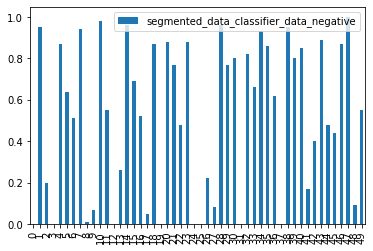

In [ ]:
dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar()

In [ ]:
dataframe.loc[dataframe['segmented_data_classifier_data_positive'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,Will Smith wins best actor Oscar for King Rich...,0.99,0.00,Ugy4u9NnBUVEReeP-gR4AaABAg,Will Smith wins best actor Oscar for King Rich...,2022-03-31 20:20:43.072131+00:00,Guardian News,UCIRYBXDze5krPDzAEOxFGVA,20K,https://yt3.ggpht.com/ytc/AKedOLQNHeFhVI28gKq6...,False,YoutubeScrapper
2,Not to mention My thick head. You can´t MISS i...,0.93,0.20,Ugx6rVUmMoGSutM6gmR4AaABAg,Not to mention My thick head. You can´t MISS i...,2022-04-21 19:59:43.078701+00:00,DUDE! Me & My Big Mouth,UCiqcIz_qoLOlGH8-VooMIXA,0,https://yt3.ggpht.com/PClK_PjO9HiE5fl4JZ0wBUU0...,False,YoutubeScrapper
3,The record for the most views in 24 hours afte...,0.66,0.00,UgzvgB7Faj_w3JZrKVd4AaABAg,The record for the most views in 24 hours afte...,2022-04-21 19:57:43.081572+00:00,XBOX360GAMEZ,UCJnI3Ylu16o7ykBqiAU0sSg,0,https://yt3.ggpht.com/gFwmQqEPHnfdQcUXFwMCNJHe...,False,YoutubeScrapper
5,"""Slap Chris Rock 2"" will be out later this fal...",0.61,0.64,Ugw6-wKfwinEAkxBkxF4AaABAg,"""Slap Chris Rock 2"" will be out later this fal...",2022-04-21 19:47:43.087054+00:00,Slap the Zebra,UCdfBLG3S86n5-e8APku_EmA,0,https://yt3.ggpht.com/eaWDIFR2EXsGa9meVOBsaly_...,False,YoutubeScrapper
6,"Cause I can't get enough\r\nYeah, I can't get ...",0.80,0.51,Ugx6A6NiI-GBEaMyFPB4AaABAg,"Cause I can't get enough\r\nYeah, I can't get ...",2022-04-21 19:38:43.089842+00:00,DONKEYASS,UCCJ5ldCAP_fqu1pmgzZbeJg,0,https://yt3.ggpht.com/eoJ7q2EjpgGDEsl-HILld6Zl...,False,YoutubeScrapper
8,C’est pas bien,0.91,0.01,Ugz1A2nqgy8uhPYHMNp4AaABAg,C’est pas bien,2022-04-21 19:20:43.093141+00:00,Moreau Delphine,UCxoCDA__tphJKdl0fhSlA_w,0,https://yt3.ggpht.com/YAfn7g-pBfVDHR2-oVJsldNt...,False,YoutubeScrapper
9,That's where I know Jada from! She's Fish Moon...,0.88,0.07,UgwRyUbTId2dcDTfrtJ4AaABAg,That's where I know Jada from! She's Fish Moon...,2022-04-21 19:20:43.095597+00:00,Jerome Valeska,UCKNgqaIPw_AEYpyDvkfPYwg,0,https://yt3.ggpht.com/V6fjUinPGKh4OYAYV3H2_LKX...,False,YoutubeScrapper
12,Chris Rock remained professional. That was am...,1.00,0.00,Ugw5h4U6Afv0RV1jMyB4AaABAg,Chris Rock remained professional. That was am...,2022-04-21 18:20:43.100715+00:00,Dark Ryder,UC4m1TCCSlo0YMgwbEnHIJTQ,0,https://yt3.ggpht.com/ytc/AKedOLRk8UZnp7iXmBa7...,False,YoutubeScrapper
16,Watch out Chris!!\nI have recharged my laser e...,0.52,0.52,UgwOa-RK_fNj7hJGPOR4AaABAg,Watch out Chris!!\nI have recharged my laser e...,2022-04-21 18:20:43.107089+00:00,I WILL BURN YOUR ASS WITH MY LASER EYES CHRIS,UCuSNAW9-Z4WJUIZvuAxjR1w,0,https://yt3.ggpht.com/0INkrGP-s2lUuRmJZvGQwGge...,False,YoutubeScrapper
17,"To think this is the same person who said ""Yaa...",0.57,0.05,UgzoTT_KbX07cxYa1TB4AaABAg,"To think this is the same person who said ""Yaa...",2022-04-21 18:20:43.108642+00:00,Omegaloe,UCZ0UoSrBoAQXyB3bBalt4rg,0,https://yt3.ggpht.com/Rv3OYqK1eVw3MiuvFB7D4G1t...,False,YoutubeScrapper


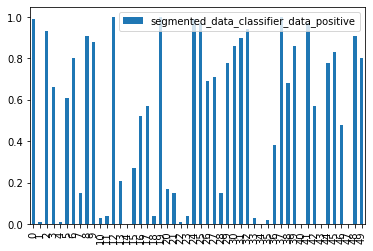

In [ ]:
dataframe[['segmented_data_classifier_data_positive']].astype('float').plot.bar()